## Imports

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from IPython import display
import vis_helper as v

2022-03-22 08:17:29.319130: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/lib/intel64
2022-03-22 08:17:29.319149: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore ab

## Prepare dataset

In [2]:
X = np.arange(1, 21, 1)

y = X*15
X = np.array(X).reshape(20, 1, 1)

print("X: ", X)
print("y: ", y)

X:  [[[ 1]]

 [[ 2]]

 [[ 3]]

 [[ 4]]

 [[ 5]]

 [[ 6]]

 [[ 7]]

 [[ 8]]

 [[ 9]]

 [[10]]

 [[11]]

 [[12]]

 [[13]]

 [[14]]

 [[15]]

 [[16]]

 [[17]]

 [[18]]

 [[19]]

 [[20]]]
y:  [ 15  30  45  60  75  90 105 120 135 150 165 180 195 210 225 240 255 270
 285 300]


## Hyperparameters

In [3]:
EPOCHS = 2000
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32

## Solution via Simple LSTM

In [4]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))

2022-03-22 08:17:30.710626: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-22 08:17:30.710830: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment

In [5]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

2022-03-22 08:17:30.809935: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-22 08:17:30.827363: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


## Training Plot

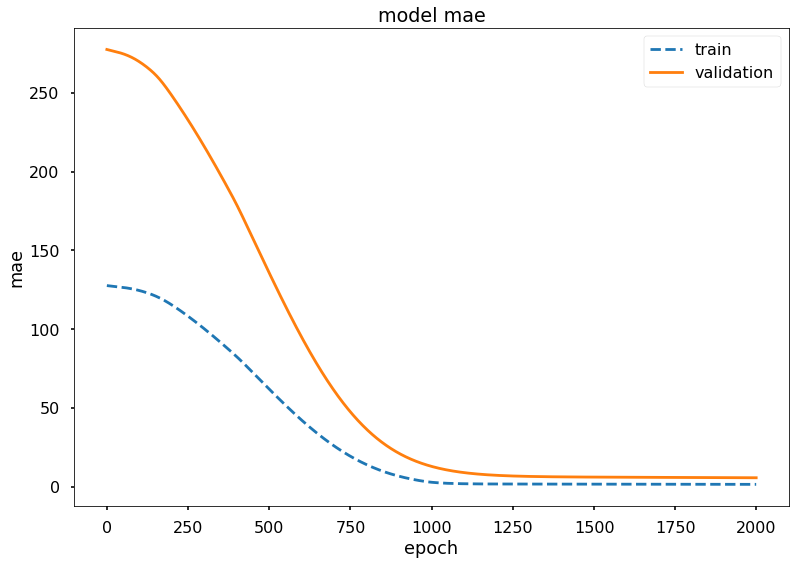

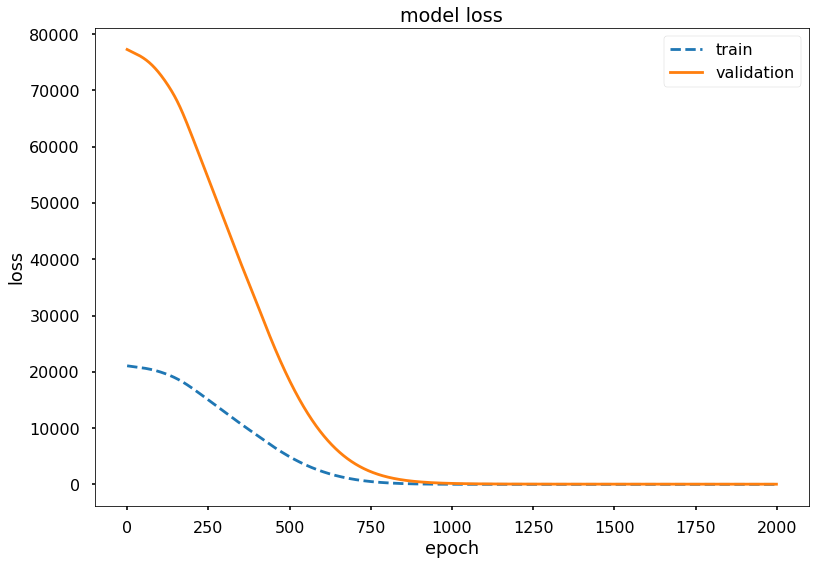

In [8]:
v.plot(history)

## Prediction

In [9]:
test_input = np.array([30])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print("Actual output: ", test_input*15)
print("Predicted output: ", test_output)

Actual output:  [[[450]]]
Predicted output:  [[432.85995]]


In [10]:
del model

## Solution via Stacked LSTM

In [11]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

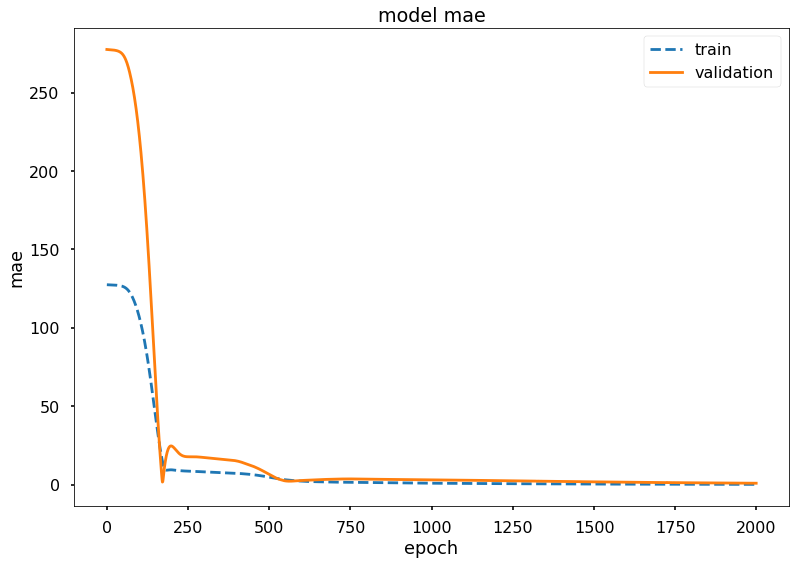

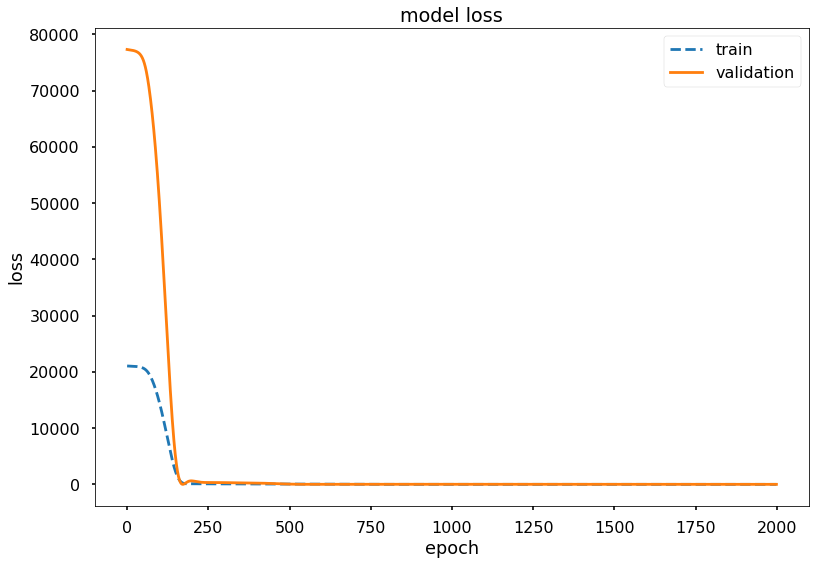

In [15]:
v.plot(history)

## Prediction

In [16]:
test_input = np.array([30])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print("Actual output: ", test_input*15)
print("Predicted output: ", test_output)

Actual output:  [[[450]]]
Predicted output:  [[453.43985]]
